
problem statements:-
* customer sgementation On the basis of -Recency,Frequency & Monetary
* Calculate the customer value
* segment the invoice frequency on the basis of days, month,season, time
* Top selling products
* Top selling product at country level.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"C:\Users\Vivek H M\Downloads\23-02-2023\ML Project by Mithilesh\Feb_21_Online_shopping_cust_segmentationring\Online_shopping.xlsx")
df=data.copy()
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [4]:
df['Country'].value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [5]:
# Dropping lower column is having more null values 

In [6]:
df.drop(["lower"],axis=1,inplace=True)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Dropping the columns which are insignificant for customer segmentation

In [9]:
df.drop(['Country','Description','StockCode'],axis=1,inplace=True)

In [10]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [11]:
df.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [12]:
df.dropna(axis=0,how='any',inplace=True)

In [13]:
df.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
#From descriptive statistics we can see that some of the order in a negative quantity. That is practically not possible.
# and min price is 0
df[df['UnitPrice']==0].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0


In [16]:
df.shape

(406829, 5)

In [17]:
#selecting the rows where the quantity is greater than 0
df1=df[df['Quantity']>0]
df1.shape

(397924, 5)

In [18]:
df1['Total']=df1['Quantity']*df1['UnitPrice']
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,12.60
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [19]:
df1.drop(['UnitPrice','Quantity'],axis=1,inplace=True)

In [20]:
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


For every item there is differnet entry for same invoice number so to get total sale we have to add total of same invoice
We can apply gropuby and sum function to get total sale of an Invoice

In [21]:
df1.reset_index()

,index,InvoiceNo,InvoiceDate,CustomerID,Total
0,0,536365,2010-12-01 08:26:00,17850.0,15.30
1,1,536365,2010-12-01 08:26:00,17850.0,20.34
2,2,536365,2010-12-01 08:26:00,17850.0,22.00
3,3,536365,2010-12-01 08:26:00,17850.0,20.34
4,4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...,...
397919,541904,581587,2011-12-09 12:50:00,12680.0,10.20
397920,541905,581587,2011-12-09 12:50:00,12680.0,12.60
397921,541906,581587,2011-12-09 12:50:00,12680.0,16.60
397922,541907,581587,2011-12-09 12:50:00,12680.0,16.60


In [22]:
df1=df1.groupby(['InvoiceNo','InvoiceDate','CustomerID'])[['Total']].sum()


In [24]:
df1=df1.reset_index()

In [26]:
df1

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


## Goal-1: Performing customer segmentation from this dataset

In [27]:
import datetime as dt

In [34]:
df1[["InvoiceDate"]].max()


InvoiceDate   2011-12-09 12:50:00
dtype: datetime64[ns]

In [36]:
Latest_date=dt.datetime(2011,12,10)
Latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [37]:
# Recency : Latest Date - Last Invoice Date
# Frequency : count of Invoice num / date of purchase by customers 
# Monetry = sum of total price by individual customer


In [54]:
RFM_scores=df1.groupby(['CustomerID']).agg({"InvoiceDate":lambda x:(Latest_date-x.max()).days,
                                          "InvoiceNo":lambda x:x.count(),
                                          "Total":lambda x:x.sum()}).reset_index()



In [57]:
RFM_score=RFM_scores.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [59]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [60]:
RFM_score.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,4.278866,2053.793018
std,1721.889758,100.007757,7.727621,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,1.000000,307.245000
50%,15299.000000,50.000000,2.000000,674.450000
75%,16778.500000,141.500000,5.000000,1661.640000
max,18287.000000,373.000000,211.000000,280206.020000


<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

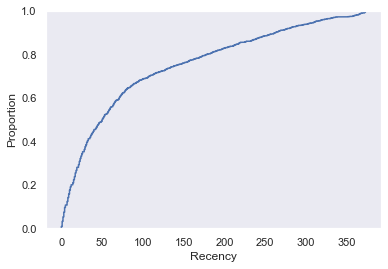

In [73]:
sns.set_style(style="dark")
sns.ecdfplot(RFM_score["Recency"])

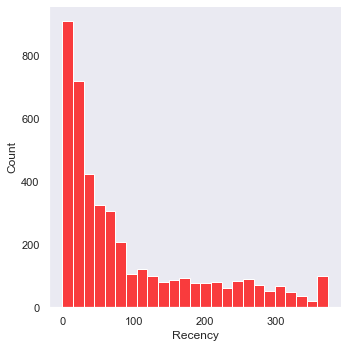

In [78]:
sns.displot(RFM_score["Recency"],color='red')

In [76]:
RFM_score["Recency"].quantile(q=[0.35,0.60,0.80])

0.35     26.0
0.60     71.0
0.80    179.0
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

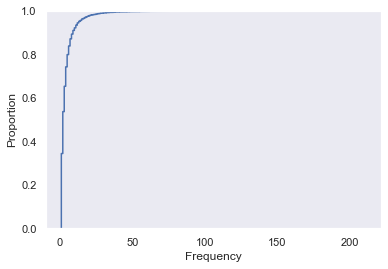

In [79]:
sns.set_style(style="dark")
sns.ecdfplot(RFM_score["Frequency"])

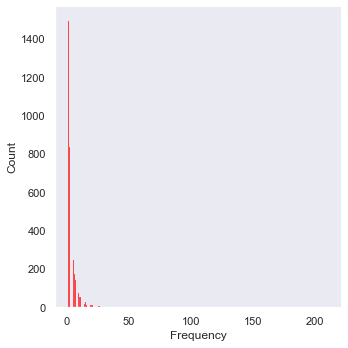

In [80]:
sns.displot(RFM_score["Frequency"],color='red')

In [85]:
RFM_score['Frequency'].quantile(q=[0.80,0.90,0.97,0.995])

0.800     6.00
0.900     9.00
0.970    18.00
0.995    41.93
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

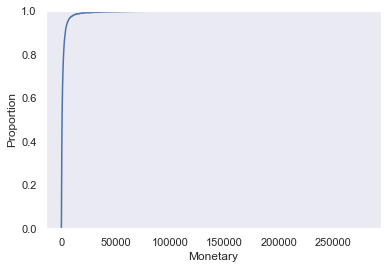

In [87]:
sns.set_style(style="dark")
sns.ecdfplot(RFM_score["Monetary"])

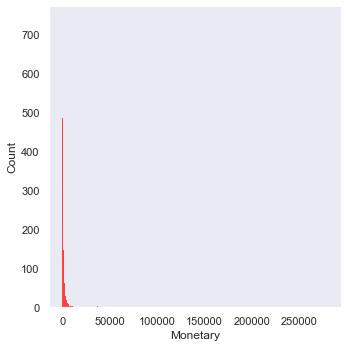

In [88]:
sns.displot(RFM_score["Monetary"],color='red')

In [90]:
RFM_score["Monetary"].quantile(q=[0.62,0.80,0.938,0.9915,0.9985])

0.6200      1013.16320
0.8000      2057.91400
0.9380      5059.56728
0.9915     26059.66428
0.9985    104036.78425
Name: Monetary, dtype: float64

In [91]:
quantile_R=RFM_score.quantile(q=[0.35,0.60,0.80])
quantile_F=RFM_score.quantile(q=[0.80,0.90,0.97,0.995])
quantile_M=RFM_score.quantile(q=[0.62,0.80,0.938,0.9915,0.9985])

In [114]:

def Rscoring(x,d,p):
    if x<=d[p][0.35]:
        return 4
    elif x<=d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 2
    else:
        return 1
    
    
def Fscoring(x,d,p):
    if x<=d[p][0.80]:
        return 1
    elif x<=d[p][0.90]:
        return 2
    elif x<=d[p][0.97]:
        return 3
    elif x<=d[p][0.995]:
        return 4
    else:
        return 5
    
def Mscoring(x,p,d):
    if x<=d[p][0.62]:
        return 1
    elif x<=d[p][0.80]:
        return 2
    elif x<=d[p][0.938]:
        return 3
    elif x<=d[p][0.9915]:
        return 4
    else:
        return 5

In [115]:
RFM_score["R"]=RFM_score['Recency'].apply(Rscoring,args=(quantile_R,'Recency'))
RFM_score["F"]=RFM_score['Frequency'].apply(Fscoring,args=(quantile_F,'Frequency'))
RFM_score["M"]=RFM_score['Monetary'].apply(Mscoring,args=('Monetary',quantile_M))


In [117]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,4,2,3
2,12348.0,75,4,1797.24,2,1,2
3,12349.0,18,1,1757.55,4,1,2
4,12350.0,310,1,334.40,1,1,1


In [118]:
RFM_score['RFM_Group']=RFM_score.R.map(str)+RFM_score.F.map(str)+RFM_score.M.map(str)

In [119]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,4,2,3,423
2,12348.0,75,4,1797.24,2,1,2,212
3,12349.0,18,1,1757.55,4,1,2,412
4,12350.0,310,1,334.40,1,1,1,111


In [124]:
RFM_score['RFM_Sum']=RFM_score["R"]+RFM_score["F"]+RFM_score["M"]
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Sum
0,12346.0,325,1,77183.60,1,1,5,115,7
1,12347.0,2,7,4310.00,4,2,3,423,9
2,12348.0,75,4,1797.24,2,1,2,212,5
3,12349.0,18,1,1757.55,4,1,2,412,7
4,12350.0,310,1,334.40,1,1,1,111,3


In [130]:
RFM_score[["RFM_Sum"]].value_counts()

RFM_Sum
6          874
5          821
3          781
4          685
7          405
8          240
9          179
10         155
11          93
12          75
14          17
13          14
dtype: int64

In [144]:
RFM_score['RFM_Sum'].quantile(q=[0.25,0.75,0.95])

0.25     4.0
0.75     7.0
0.95    10.0
Name: RFM_Sum, dtype: float64

In [146]:
quantile=RFM_score.quantile(q=[0.25,0.75,0.95])

In [150]:
def Loyalty(x,d,p):
    if x<=4:
        return 'Silver'
    if x<=7:
        return 'Gold'
    if x<=10:
        return 'Diamond'
    else:
        return 'Platinum'

In [153]:
RFM_score['Loyalty']=RFM_score['RFM_Sum'].apply(Loyalty,args=(quantile,'RFM_Sum'))
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Sum,Loyalty
0,12346.0,325,1,77183.60,1,1,5,115,7,Gold
1,12347.0,2,7,4310.00,4,2,3,423,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,212,5,Gold
3,12349.0,18,1,1757.55,4,1,2,412,7,Gold
4,12350.0,310,1,334.40,1,1,1,111,3,Silver


<AxesSubplot:xlabel='Recency', ylabel='RFM_Sum'>

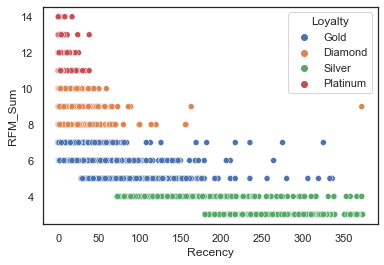

In [172]:
sns.set_style(style='white')
sns.scatterplot(x=RFM_score['Recency'],y=RFM_score['RFM_Sum'],hue=RFM_score['Loyalty'])

<AxesSubplot:xlabel='Frequency', ylabel='RFM_Sum'>

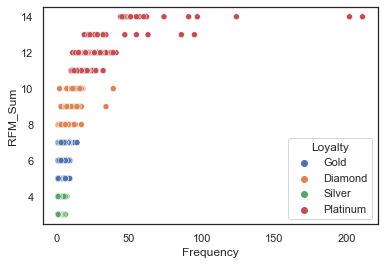

In [173]:
sns.scatterplot(x=RFM_score['Frequency'],y=RFM_score['RFM_Sum'],hue=RFM_score['Loyalty'])

<AxesSubplot:xlabel='Monetary', ylabel='RFM_Sum'>

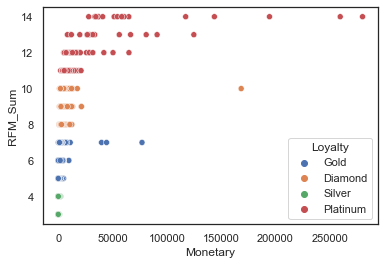

In [174]:
sns.scatterplot(x=RFM_score['Monetary'],y=RFM_score['RFM_Sum'],hue=RFM_score['Loyalty'])

<AxesSubplot:xlabel='Loyalty', ylabel='RFM_Sum'>

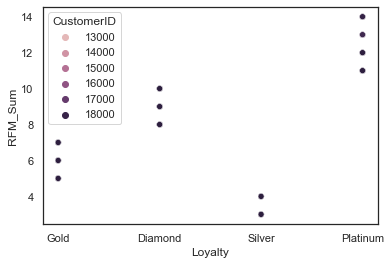

In [175]:
sns.scatterplot(y=RFM_score['RFM_Sum'],x=RFM_score['Loyalty'],hue=RFM_score['CustomerID'])

In [176]:
RFM_score['Loyalty'].value_counts()

Gold        2100
Silver      1466
Diamond      574
Platinum     199
Name: Loyalty, dtype: int64

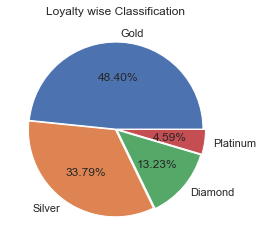

In [192]:
plt.pie(RFM_score['Loyalty'].value_counts(),labels=RFM_score['Loyalty'].value_counts().index,explode=[0.00,0.01,0.02,0.03],autopct='%2.2f%%')
plt.title("Loyalty wise Classification")
plt.show()

# KMeans Algorithm

In [195]:
# finding the appropriate cluster number by applying the k_means algorithm elbow method

In [198]:
x=RFM_score[['RFM_Sum']]
x

,RFM_Sum
0,7
1,9
2,5
3,7
4,3
...,...
4334,3
4335,3
4336,6
4337,10


In [229]:
from sklearn.cluster import KMeans

K=[]
for i in range(1,30):
    KM=KMeans(n_clusters=i,random_state=42,init='k-means++')
    KM.fit(x)
    K.append(KM.inertia_)
    
   

In [230]:
K

[22429.316893293475,
 7697.757098261995,
 3317.3875103979044,
 1852.1587422925538,
 1183.2106621721746,
 818.2822856373938,
 398.59065729706947,
 247.89298287846435,
 118.38915094339636,
 49.19527649769589,
 7.677419354838723,
 1.5854082738872708e-26,
 1.6579945705240836e-26,
 1.6044999403887837e-26,
 1.5749047141937695e-26,
 1.5749047141937695e-26,
 1.5939963806952824e-26,
 1.37346230277218e-26,
 1.4037286770342142e-26,
 1.634766314650818e-26,
 1.4178492872376703e-26,
 5.8914412702959316e-27,
 6.631263376900978e-27,
 5.8914412702959316e-27,
 6.526227779965965e-27,
 6.187393532246074e-27,
 6.187393532246074e-27,
 2.246299300246715e-26,
 5.996476867230945e-27]

In [227]:
a=list(range(1,30))

<AxesSubplot:>

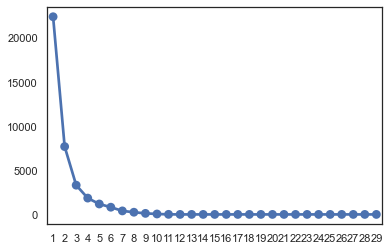

In [231]:
sns.pointplot(a,K)

In [308]:
KM=KMeans(n_clusters=4,init='k-means++',max_iter=100,random_state=42)
y_means=KM.fit_predict(x)
y_means

array([0, 2, 3, ..., 3, 2, 3])

In [309]:
RFM_score['Cluster']=KM.labels_
RFM_score[RFM_score['Loyalty']=='Gold'].head(40)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Sum,Loyalty,Cluster
0,12346.0,325,1,77183.60,1,1,5,115,7,Gold,0
2,12348.0,75,4,1797.24,2,1,2,212,5,Gold,3
3,12349.0,18,1,1757.55,4,1,2,412,7,Gold,0
11,12358.0,1,2,1168.06,4,1,2,412,7,Gold,0
13,12360.0,52,3,2662.06,3,1,3,313,7,Gold,0
17,12364.0,7,4,1313.10,4,1,2,412,7,Gold,0
19,12367.0,4,1,168.90,4,1,1,411,6,Gold,3
20,12370.0,51,4,3545.69,3,1,3,313,7,Gold,0
21,12371.0,44,2,1887.96,3,1,2,312,6,Gold,3
22,12372.0,71,3,1298.04,3,1,2,312,6,Gold,3


In [310]:
RFM_score['Cluster'].value_counts()

3    1695
1    1466
0     645
2     533
Name: Cluster, dtype: int64

In [312]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,KM.labels_))

0.6724263527310406
